### Model Explainability Using Diabetes Dataset (Practice Notebook - Analytics Vidhya (Reference))

   - Model explainability refers to the concept of being able to understand the machine learning model.
   - Being able to properly interpret the model increases trust.
   - Especiallu useful for explaining black box models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [3]:
diabetes_df = pd.read_csv( "diabetes.csv", index_col=[0] )

In [4]:
diabetes_df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [6]:
X_features = list( diabetes_df.columns )
X_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
X_features.remove('Outcome')
X_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( diabetes_df[X_features],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100 )

In [10]:
X_train.shape

(537, 7)

In [11]:
X_test.shape

(231, 7)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                                 max_features = 0.2,
                                 max_depth = 10,
                                 max_samples = 0.5)

In [13]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [14]:
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
y_pred = rf_clf.predict( X_test )

In [15]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [3]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [16]:
import eli5.sklearn

In [17]:
eli5.explain_weights( 
    rf_clf, 
    feature_names = X_features )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Glucose', weight=0.24506252834036946, std=0.10133534508238408, value=None), FeatureWeight(feature='BMI', weight=0.1701899702839688, std=0.05990579973707207, value=None), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.14331842222830607, std=0.06204714442467659, value=None), FeatureWeight(feature='Age', weight=0.14270819737289914, std=0.05937355625351769, value=None), FeatureWeight(feature='BloodPressure', weight=0.11159990040918892, std=0.04819533063593936, value=None), FeatureWeight(feature='Insulin', weight=0.09413296767188069, std=0.04947929635000679, value=None), FeatureWeight(feature='SkinThickness', weight=0.09298801369338698, std=0.03659848488435628, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [18]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [19]:
y_test.iloc[0]

0

In [20]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[0],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.654141791044776, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.12736235733253504, std=None, value=79.0), FeatureWeight(feature='Insulin', weight=0.08039342055827277, std=None, value=48.0), FeatureWeight(feature='Age', weight=0.07760869951035998, std=None, value=23.0), FeatureWeight(feature='BloodPressure', weight=0.07070883673908367, std=None, value=60.0)], neg=[FeatureWeight(feature='SkinThickness', weight=-0.13878771169806053, std=None, value=42.0), FeatureWeight(feature='BMI', weight=-0.08625262942823303, std=None, value=43.5), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.0583595466674296, std=None, value=0.6779999999999999)], pos_remaining=0, neg_remaining=0), proba=0.7268152173913043, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [21]:
X_test.iloc[4]

Glucose                     123.000
BloodPressure                70.000
SkinThickness                44.000
Insulin                      94.000
BMI                          33.100
DiabetesPedigreeFunction      0.374
Age                          40.000
Name: 9, dtype: float64

In [22]:
y_test.iloc[4]

0

In [23]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[4],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.654141791044776, std=None, value=1.0), FeatureWeight(feature='Insulin', weight=0.08512818494378492, std=None, value=94.0), FeatureWeight(feature='Glucose', weight=0.03914225683661228, std=None, value=123.0), FeatureWeight(feature='BloodPressure', weight=0.03153691831019864, std=None, value=70.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.014728138669043208, std=None, value=0.374)], neg=[FeatureWeight(feature='Age', weight=-0.10686299404042847, std=None, value=40.0), FeatureWeight(feature='SkinThickness', weight=-0.08887400214039012, std=None, value=44.0), FeatureWeight(feature='BMI', weight=-0.04473083742732495, std=None, value=33.1)], pos_remaining=0, neg_remaining=0), proba=0.5842094561962717, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [81]:
## PDP - Partial Dependence Plot
## Explains the global behavior of a model by showing the relationship of the marginal effect of each of the predictors on the response variable.
## Shows relationship between target variable and a feature variable
## The plot assumes that the feature of interest (whose partial dependence is being computed) is not highly correlated with the other features.
## If the features of the model are correlated, then PDP does not provide the correct interpretation. 
## We cannot plot PDP for all complex classifiers like Neural Networks.

In [24]:
from sklearn.inspection import PartialDependenceDisplay

In [26]:
## Effect of insulin on Diabetes

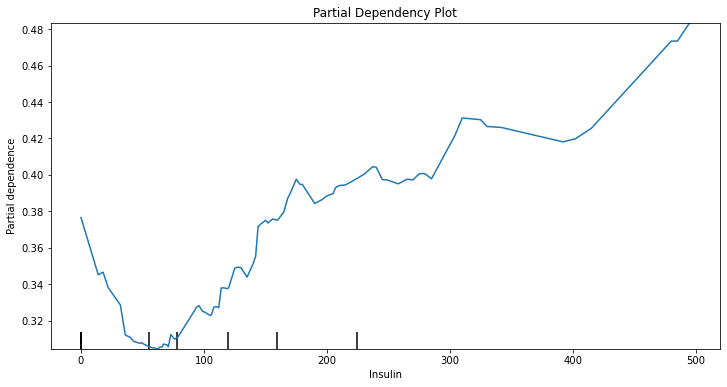

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Insulin'],
                                        feature_names = X_features,
                                        ax = ax);

In [27]:
## Effect of Glucose on Diabetes

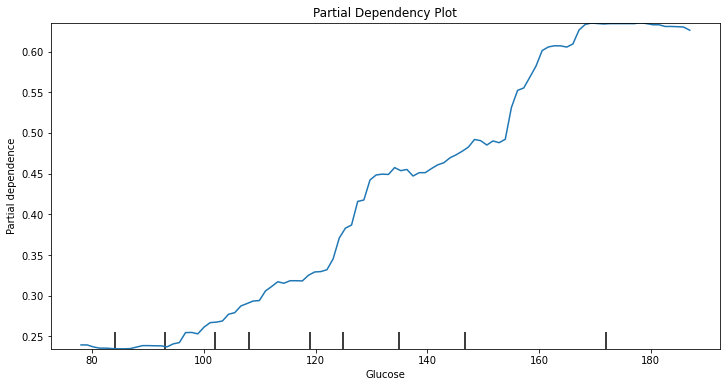

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Glucose'],
                                        feature_names = X_features,
                                        ax = ax)

In [66]:
## LIME – Local Interpretation of Model Explanation
## Feature values of single data sample and considering its impact on output
## Model agnostic technique and can be used on any model

In [30]:
!pip install lime

     |████████████████████████████████| 275 kB 339 kB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=7711cb8a90f17c6f7f72a2c9090b9a4fb2bca9f52c31b5dd91bd90774849c83d
  Stored in directory: /Users/ranjeeta/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [71]:
import lime
import lime.lime_tabular

In [72]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = y_train,                                   
                                   feature_names = X_features, 
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))

In [73]:
## Explaining a case of Non-Diabetes (Picking one instance)

In [74]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [75]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.3894151346156197
Prediction_local [0.31139486]
Right: 0.27318478260869566


In [76]:
exp.show_in_notebook(show_table=True, show_all=False)

In [37]:
## Explaining a case of Diabetes

In [77]:
X_test.iloc[4]

Glucose                     123.000
BloodPressure                70.000
SkinThickness                44.000
Insulin                      94.000
BMI                          33.100
DiabetesPedigreeFunction      0.374
Age                          40.000
Name: 9, dtype: float64

In [78]:
exp = explainer.explain_instance( X_test.iloc[4].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.3360752776182652
Prediction_local [0.45686622]
Right: 0.4157905438037284


In [79]:
exp.show_in_notebook(show_table=True, show_all=False)

In [82]:
## Using Shapley Values (SHapley Additive exPlanations)
## SHAP shows the impact of each feature by interpreting the impact of a certain value compared to a baseline value.
## The baseline used for prediction is the average of all the predictions. 
## SHAP values allow us to determine any prediction as a sum of the effects of each feature value.

In [42]:
!pip install shap

     |████████████████████████████████| 433 kB 1.0 MB/s eta 0:00:01


In [43]:
import shap

In [44]:
## Explaining a case of Non-diabetes

In [45]:
row_to_show = 1
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

array([[0.92297011, 0.07702989]])

In [46]:
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(data_for_prediction_array)

In [47]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

In [48]:
## Explaining case of Diabetes

In [49]:
row_to_show = 4
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

In [50]:
## Global Explanation of Shap

In [52]:
explainer = shap.TreeExplainer( rf_clf )

In [53]:
shap_values = explainer.shap_values( X_train )

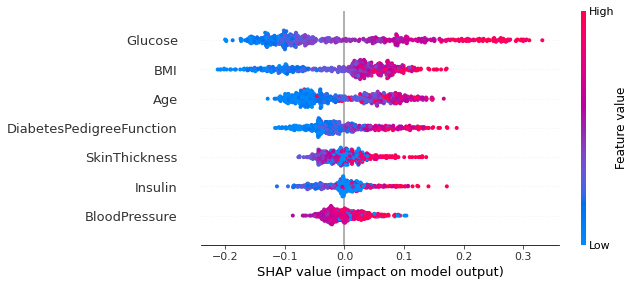

In [54]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )

In [55]:
explainer.expected_value

array([0.65414179, 0.34585821])

In [56]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

In [83]:
## Individual Conditional Expectations (ICE)
## ICE is an extension of PDP(global method)
## Using ICE, we can explain heterogeneous relationships. 
## While PDP supports two feature explanations using ICE we can explain only one feature at a time.


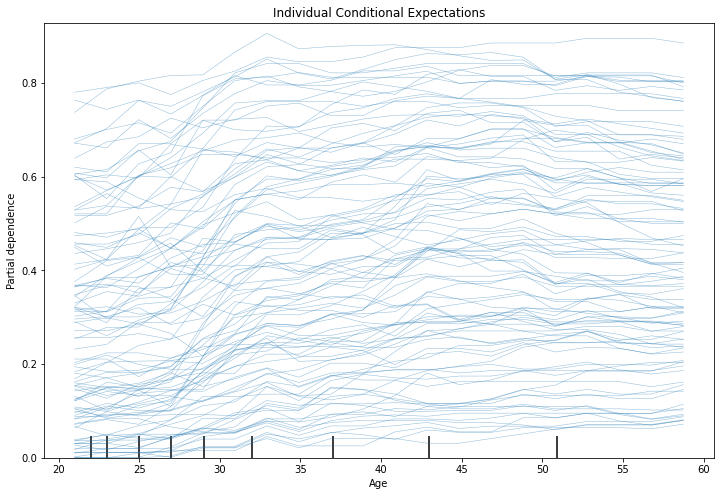

In [64]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

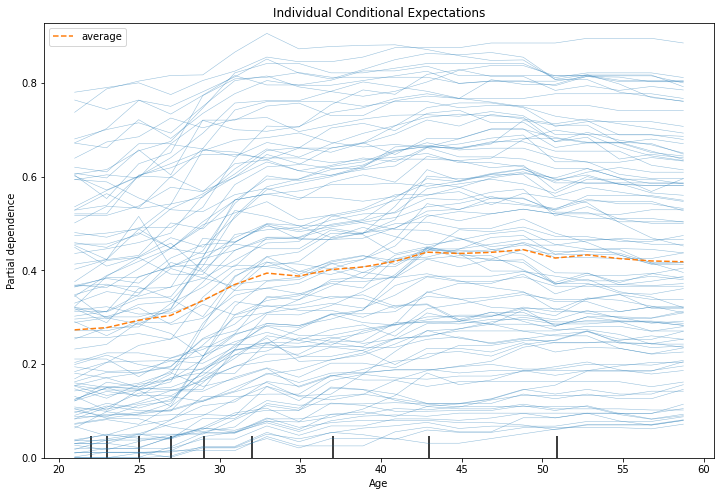

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)